<a href="https://colab.research.google.com/github/qwoixx/Biryukov_Project_Fashion/blob/main/Biryukov_fashion_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

АНАЛИЗ ДАННЫХ О ЗИМНЕЙ МОДЕ 2024

ОБЩИЙ ОБЗОР ДАННЫХ
Размер датасета: (150, 12)

Первые 3 строки:
   ID   Brand Category  Color   Material       Style  Gender       Season  \
0   1  Adidas   Gloves  Brown  Polyester  Streetwear   Women  Winter 2025   
1   2   Gucci   Gloves    Red    Leather      Sporty     Men  Winter 2023   
2   3     H&M     Coat  Brown     Fleece  Streetwear  Unisex  Winter 2025   

   Price(USD)  Popularity_Score  Customer_Rating Trend_Status  
0      244.06               6.0              4.9     Trending  
1      366.73               8.8              3.3     Trending  
2      741.55               4.8              3.5     Trending  

Последние 3 строки:
      ID   Brand Category  Color Material   Style  Gender       Season  \
147  148  Uniqlo   Jacket   Gray  Leather  Casual  Unisex  Winter 2024   
148  149   Prada   Beanie  Black     Wool  Formal  Unisex  Winter 2025   
149  150   Gucci   Gloves    Red     Down  Luxury     Men  Winter 2024   

     Price(USD)  Po

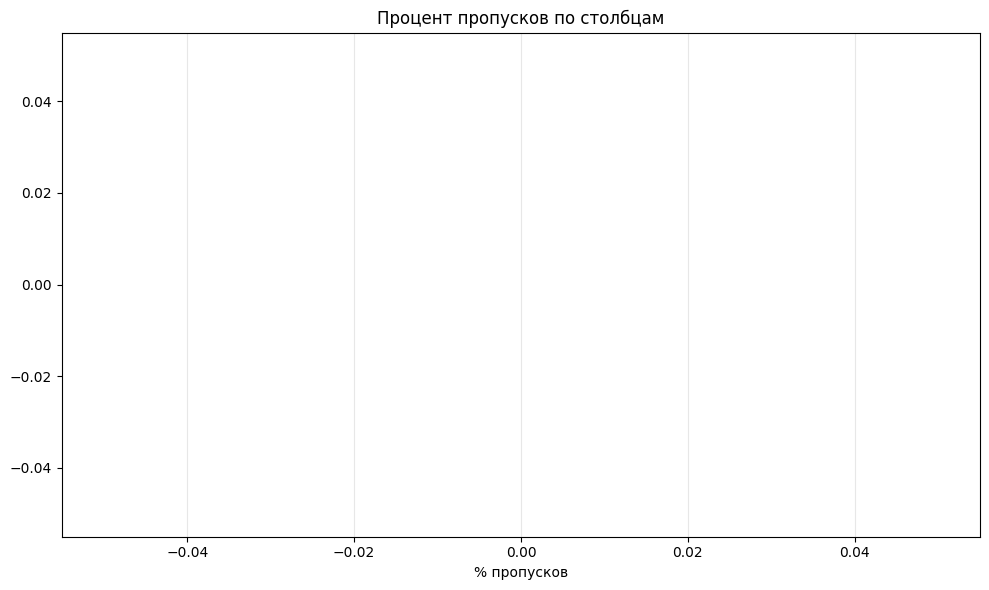


Удалено строк: 0
Осталось строк: 150

СТАТИСТИЧЕСКИЙ АНАЛИЗ
                    mean     std  медиана  дисперсия  коэфф_вариации
ID                 75.50   43.45    75.50    1887.50           57.54
Price(USD)        443.11  211.63   445.82   44787.29           47.76
Popularity_Score    5.76    2.66     5.85       7.05           46.08
Customer_Rating     3.80    0.72     3.80       0.52           18.92

РАСПРЕДЕЛЕНИЯ КЛЮЧЕВЫХ ПЕРЕМЕННЫХ


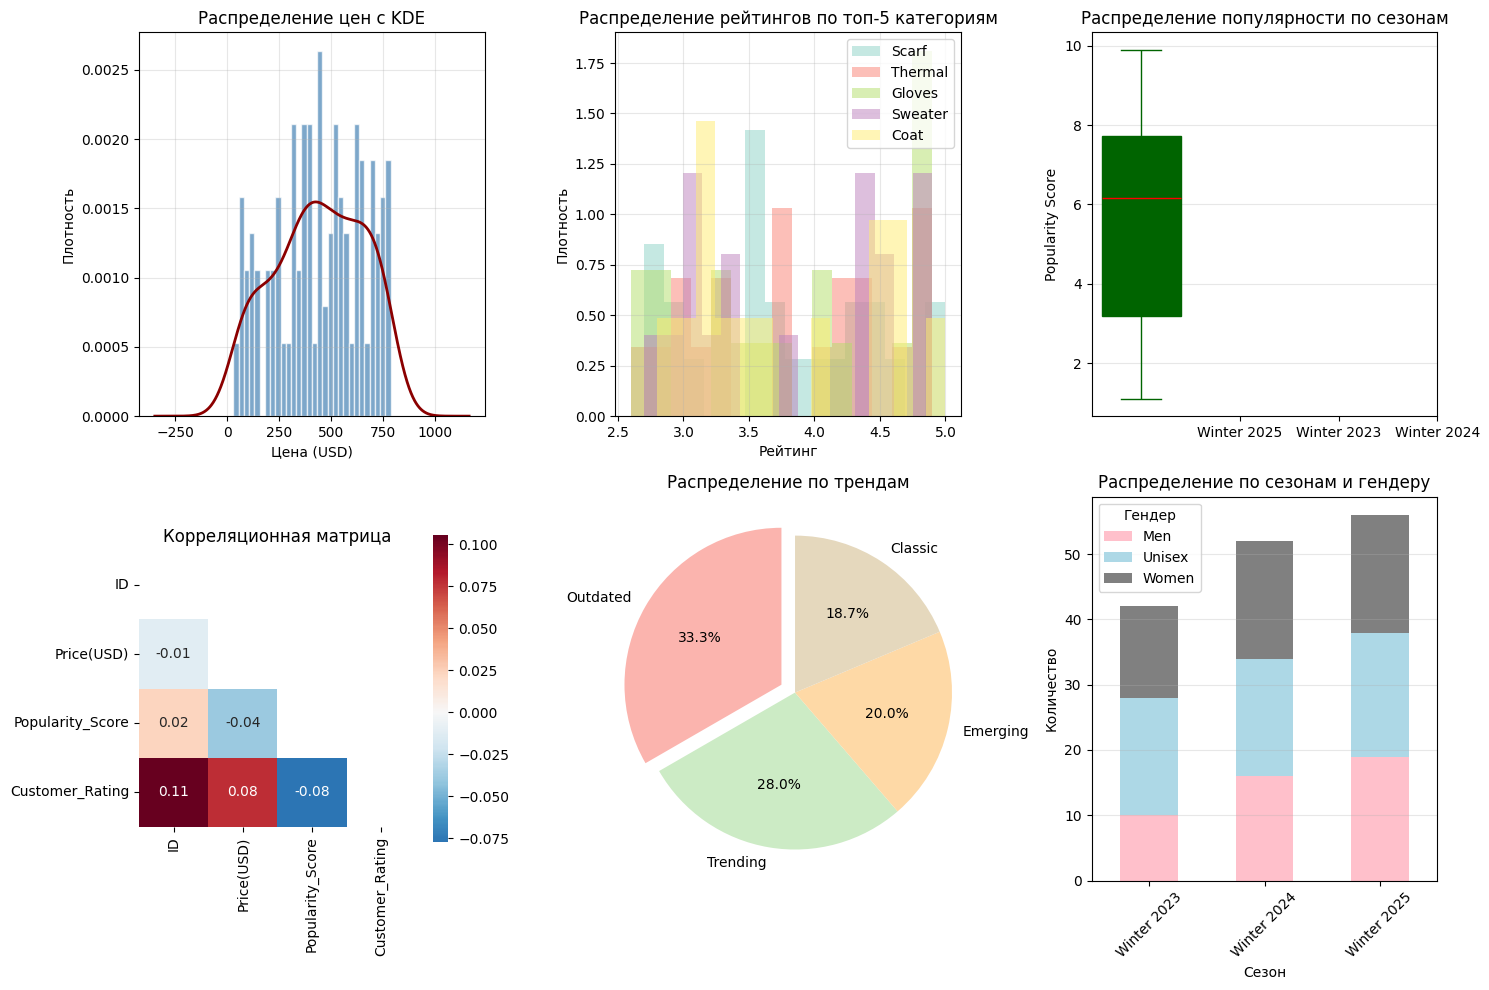


РАСШИРЕННЫЙ ГРУППОВОЙ АНАЛИЗ

ТОП-10 БРЕНДОВ ПО СРЕДНЕЙ ЦЕНЕ:
              mean  count
Brand                    
Adidas      565.40     10
Uniqlo      536.19     16
Levi's      459.95      8
Gucci       458.99     14
H&M         443.94     15
Mango       440.22     25
Prada       437.88     16
Zara        402.76     13
Nike        373.65     13
North Face  368.17     20

АНАЛИЗ КАТЕГОРИЙ:
         Price(USD)               Customer_Rating Popularity_Score
               mean     std count            mean             mean
Category                                                          
Beanie       438.44  228.01    12            3.83             5.97
Boots        430.66  182.80    11            3.41             7.06
Cardigan     476.48  219.59    11            3.68             4.95
Coat         505.98  208.21    14            3.78             6.20
Gloves       381.24  212.40    18            3.86             6.02

АНАЛИЗ ВЫБРОСОВ
Выбросы по цене (метод IQR): 0 записей
Статистика выб

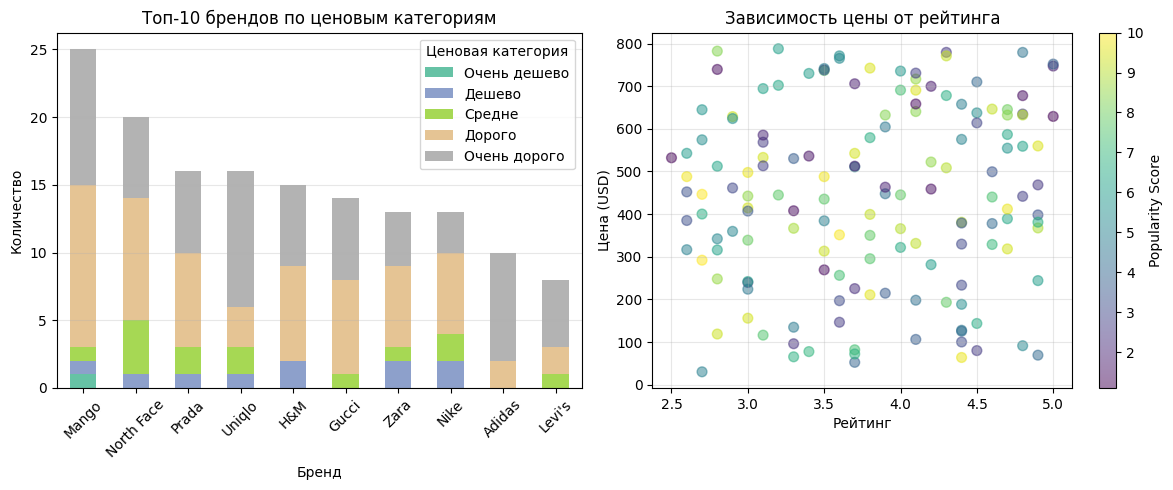


ФИНАЛЬНЫЙ ОТЧЕТ
Очищенные данные сохранены в файл: Winter_Fashion_Trends_CLEANED.csv
Исходный размер: (150, 12)
Очищенный размер: (150, 14)
Сохранено: 100.0% данных

Ключевые выводы:
1. Самые дорогие бренды: Adidas, Uniqlo, Levi's
2. Самая популярная категория: Scarf
3. Средняя цена: $443.11
4. Средний рейтинг: 3.8/5


In [8]:
from pandas import *
from numpy import *
from matplotlib.pyplot import *
from seaborn import *
from warnings import filterwarnings
filterwarnings('ignore')
from matplotlib import cm

df = read_csv('Winter_Fashion_Trends_Dataset.csv')
print("=" * 70)
print("АНАЛИЗ ДАННЫХ О ЗИМНЕЙ МОДЕ 2024")
print("=" * 70)

def print_section(title):
    print(f"\n{'='*60}")
    print(f"{title}")
    print(f"{'='*60}")

print_section("ОБЩИЙ ОБЗОР ДАННЫХ")
print("Размер датасета:", df.shape)
print("\nПервые 3 строки:")
print(df.head(3))
print("\nПоследние 3 строки:")
print(df.tail(3))
print_section("АНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ")
missing_percent = (df.isnull().sum() / len(df) * 100).round(2)
missing_df = DataFrame({
    'Кол-во пропусков': df.isnull().sum(),
    '% пропусков': missing_percent
})
print(missing_df[missing_df['Кол-во пропусков'] > 0])

figure(figsize=(10, 6))
barh(missing_percent[missing_percent > 0].index,
     missing_percent[missing_percent > 0],
     color=cm.viridis(linspace(0.3, 0.8, len(missing_percent[missing_percent > 0]))))
title('Процент пропусков по столбцам')
xlabel('% пропусков')
grid(axis='x', alpha=0.3)
tight_layout()
show()
initial_count = len(df)
df_clean = df.dropna().copy()
df_clean = df_clean.drop_duplicates().reset_index(drop=True)
print(f"\nУдалено строк: {initial_count - len(df_clean)}")
print(f"Осталось строк: {len(df_clean)}")
print_section("СТАТИСТИЧЕСКИЙ АНАЛИЗ")
stats = df_clean.describe().T
stats['дисперсия'] = df_clean.select_dtypes(include=[number]).var()
stats['медиана'] = df_clean.select_dtypes(include=[number]).median()
stats['коэфф_вариации'] = (stats['std'] / stats['mean'] * 100).round(2)
print(stats[['mean', 'std', 'медиана', 'дисперсия', 'коэфф_вариации']].round(2))
print_section("РАСПРЕДЕЛЕНИЯ КЛЮЧЕВЫХ ПЕРЕМЕННЫХ")
figure(figsize=(15, 10))
subplot(2, 3, 1)
hist(df_clean['Price(USD)'], bins=30, color='steelblue',
     edgecolor='white', alpha=0.7, density=True)
df_clean['Price(USD)'].plot(kind='kde', color='darkred', linewidth=2)
title('Распределение цен с KDE')
xlabel('Цена (USD)')
ylabel('Плотность')
grid(alpha=0.3)
subplot(2, 3, 2)
categories = df_clean['Category'].value_counts().index[:5]
colors = cm.Set3(linspace(0, 1, len(categories)))
for i, cat in enumerate(categories):
    hist(df_clean[df_clean['Category'] == cat]['Customer_Rating'],
         bins=15, alpha=0.5, label=cat, color=colors[i], density=True)
title('Распределение рейтингов по топ-5 категориям')
xlabel('Рейтинг')
ylabel('Плотность')
legend()
grid(alpha=0.3)
subplot(2, 3, 3)
boxplot_data = [df_clean[df_clean['Season'] == season]['Popularity_Score']
                for season in df_clean['Season'].unique()]
season_labels = df_clean['Season'].unique()
bp = boxplot(boxplot_data, patch_artist=True,
             boxprops=dict(facecolor='lightgreen', color='darkgreen'),
             medianprops=dict(color='red'),
             whiskerprops=dict(color='darkgreen'),
             capprops=dict(color='darkgreen'),
             flierprops=dict(marker='o', color='red', alpha=0.5))

xticks(range(1, len(season_labels) + 1), season_labels)
title('Распределение популярности по сезонам')
ylabel('Popularity Score')
grid(axis='y', alpha=0.3)
subplot(2, 3, 4)
numeric_df = df_clean.select_dtypes(include=[number])
corr_matrix = numeric_df.corr()
mask = triu(ones_like(corr_matrix, dtype=bool))
heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
        cmap='RdBu_r', center=0, square=True,
        cbar_kws={"shrink": 0.8})
title('Корреляционная матрица')
subplot(2, 3, 5)
trend_counts = df_clean['Trend_Status'].value_counts()
explode = [0.1 if i == trend_counts.idxmax() else 0 for i in trend_counts.index]
pie(trend_counts.values, labels=trend_counts.index,
    autopct='%1.1f%%', startangle=90, explode=explode,
    colors=cm.Pastel1(arange(len(trend_counts))/len(trend_counts)))
title('Распределение по трендам')
axis('equal')
subplot(2, 3, 6)
gender_season = df_clean.groupby(['Season', 'Gender']).size().unstack()
gender_season.plot(kind='bar', stacked=True, ax=gca(),
                   color=['pink', 'lightblue', 'gray'])
title('Распределение по сезонам и гендеру')
xlabel('Сезон')
ylabel('Количество')
xticks(rotation=45)
legend(title='Гендер')
grid(axis='y', alpha=0.3)

tight_layout()
show()
print_section("РАСШИРЕННЫЙ ГРУППОВОЙ АНАЛИЗ")
print("\nТОП-10 БРЕНДОВ ПО СРЕДНЕЙ ЦЕНЕ:")
top_brands = (df_clean.groupby('Brand')['Price(USD)']
              .agg(['mean', 'count'])
              .sort_values('mean', ascending=False)
              .head(10))
print(top_brands.round(2))
print("\nАНАЛИЗ КАТЕГОРИЙ:")
category_stats = df_clean.groupby('Category').agg({
    'Price(USD)': ['mean', 'std', 'count'],
    'Customer_Rating': 'mean',
    'Popularity_Score': 'mean'
}).round(2)
print(category_stats.head())
print_section("АНАЛИЗ ВЫБРОСОВ")
Q1 = df_clean['Price(USD)'].quantile(0.25)
Q3 = df_clean['Price(USD)'].quantile(0.75)
IQR = Q3 - Q1
price_outliers = df_clean[(df_clean['Price(USD)'] < (Q1 - 1.5 * IQR)) |
                         (df_clean['Price(USD)'] > (Q3 + 1.5 * IQR))]
print(f"Выбросы по цене (метод IQR): {len(price_outliers)} записей")
print("Статистика выбросов:")
print(price_outliers[['Brand', 'Category', 'Price(USD)']].describe().round(2))
print_section("ИНТЕРАКТИВНЫЕ СВОДНЫЕ ТАБЛИЦЫ")
pivot1 = pivot_table(df_clean,
                    values=['Price(USD)', 'Customer_Rating'],
                    index='Category',
                    columns='Trend_Status',
                    aggfunc={'Price(USD)': 'mean',
                            'Customer_Rating': 'mean'}).round(2)
print("\nСредняя цена по категориям и трендам:")
print(pivot1['Price(USD)'].head())
pivot2 = pivot_table(df_clean,
                    values='Price(USD)',
                    index='Season',
                    columns='Gender',
                    aggfunc='count',
                    fill_value=0)
print("\nКоличество товаров по сезонам и гендеру:")
print(pivot2)
print_section("СОЗДАНИЕ НОВЫХ ПРИЗНАКОВ")
df_clean['price_category'] = cut(df_clean['Price(USD)'],
                                bins=[0, 50, 100, 200, 500, df_clean['Price(USD)'].max()],
                                labels=['Очень дешево', 'Дешево', 'Средне', 'Дорого', 'Очень дорого'])
df_clean['rating_category'] = cut(df_clean['Customer_Rating'],
                                  bins=[0, 2, 3, 4, 5],
                                  labels=['Плохо', 'Удовлетворительно', 'Хорошо', 'Отлично'])
print("\nРаспределение по ценовым категориям:")
print(df_clean['price_category'].value_counts())
print("\nРаспределение по категориям рейтинга:")
print(df_clean['rating_category'].value_counts())
print_section("ВИЗУАЛИЗАЦИЯ НОВЫХ ПРИЗНАКОВ")
figure(figsize=(12, 5))
subplot(1, 2, 1)
price_by_brand = (df_clean.groupby(['Brand', 'price_category'])
                  .size()
                  .unstack()
                  .fillna(0))
price_by_brand.loc[price_by_brand.sum(axis=1).nlargest(10).index].plot(
    kind='bar', stacked=True, ax=gca(),
    colormap=cm.Set2)
title('Топ-10 брендов по ценовым категориям')
xlabel('Бренд')
ylabel('Количество')
xticks(rotation=45)
legend(title='Ценовая категория')
grid(axis='y', alpha=0.3)
subplot(1, 2, 2)
scatter(df_clean['Customer_Rating'], df_clean['Price(USD)'],
        alpha=0.5, c=df_clean['Popularity_Score'],
        cmap='viridis', s=50)
colorbar(label='Popularity Score')
title('Зависимость цены от рейтинга')
xlabel('Рейтинг')
ylabel('Цена (USD)')
grid(alpha=0.3)
tight_layout()
show()
df_clean.to_csv('Winter_Fashion_Trends_CLEANED.csv', index=False)
print_section("ФИНАЛЬНЫЙ ОТЧЕТ")
print(f"Очищенные данные сохранены в файл: Winter_Fashion_Trends_CLEANED.csv")
print(f"Исходный размер: {df.shape}")
print(f"Очищенный размер: {df_clean.shape}")
print(f"Сохранено: {len(df_clean)/len(df)*100:.1f}% данных")
print("\nКлючевые выводы:")
print("1. Самые дорогие бренды:", ', '.join(top_brands.index[:3].tolist()))
print("2. Самая популярная категория:", df_clean['Category'].value_counts().index[0])
print("3. Средняя цена:", f"${df_clean['Price(USD)'].mean():.2f}")
print("4. Средний рейтинг:", f"{df_clean['Customer_Rating'].mean():.1f}/5")
print("=" * 70)